# DATA SCIENCE PROJECT ON DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS
## BUSINESS CASE: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE LATE DELIVERY

### VISUALIZATION SUMMARY:
1.Domain Analysis of all Relevant Features v/s Late Delivery with insights.

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')  # setting up background
from scipy import stats
import warnings # To avoid warnings
warnings.filterwarnings('ignore')

### Insights:
We are importing essential Python libraries for data analysis and visualization. These libraries include Pandas for data manipulation, NumPy for numerical operations, and Matplotlib/Seaborn for data visualization and set up the notebook to display Matplotlib plots inline. Additionally, we suppress warnings using the 'warnings' library.

#  Importing RAW Data

In [2]:
v_df=pd.read_csv(r'C:\Users\user\Downloads\GEMS PROJECT\data\raw\DataCoSupplyChainDataset.csv', encoding='latin1')
pd.set_option('display.max_columns',None) # Used to display the all features

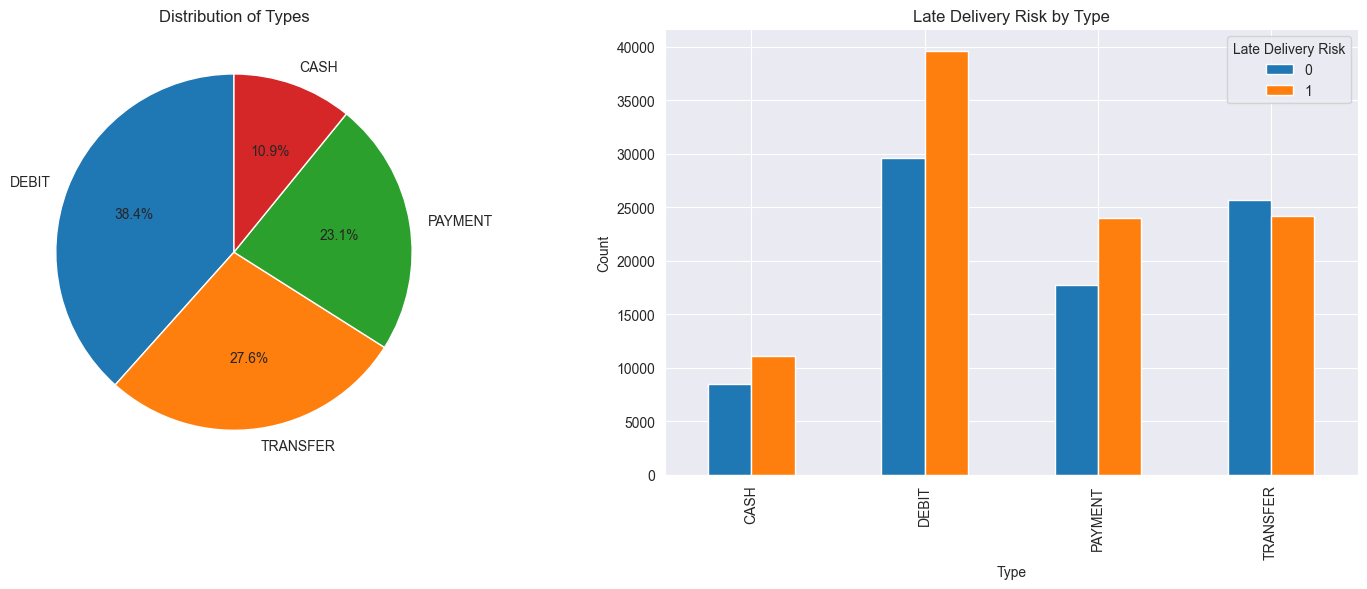

In [3]:
type_counts = v_df['Type'].value_counts()

type_late_delivery_counts = v_df.groupby(['Type', 'Late_delivery_risk']).size().unstack(fill_value=0)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart for distribution of types
axs[0].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of Types')

# Bar chart for late delivery risk for each type
type_late_delivery_counts.plot(kind='bar', ax=axs[1])
axs[1].set_title('Late Delivery Risk by Type')
axs[1].set_ylabel('Count')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [4]:
print("Distribution of Types:")
print(type_counts)

print("\nLate Delivery Risk by Type:")
print(type_late_delivery_counts)

Distribution of Types:
Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

Late Delivery Risk by Type:
Late_delivery_risk      0      1
Type                            
CASH                 8507  11109
DEBIT               29646  39649
PAYMENT             17721  24004
TRANSFER            25668  24215


### Insights:
DEBIT transaction is the most frequently used transaction.\
DEBIT transactions has high risk of late delivery and TRANSFER transactions has minimum risk.

In [5]:
v_df['order date (DateOrders)'] = pd.to_datetime(v_df['order date (DateOrders)'])
v_df['shipping date (DateOrders)'] = pd.to_datetime(v_df['shipping date (DateOrders)'])

v_df['order_year'] = v_df['order date (DateOrders)'].dt.year
v_df['order_month'] = v_df['order date (DateOrders)'].dt.month

v_df['shipping_year'] = v_df['shipping date (DateOrders)'].dt.year
v_df['shipping_month'] = v_df['shipping date (DateOrders)'].dt.month

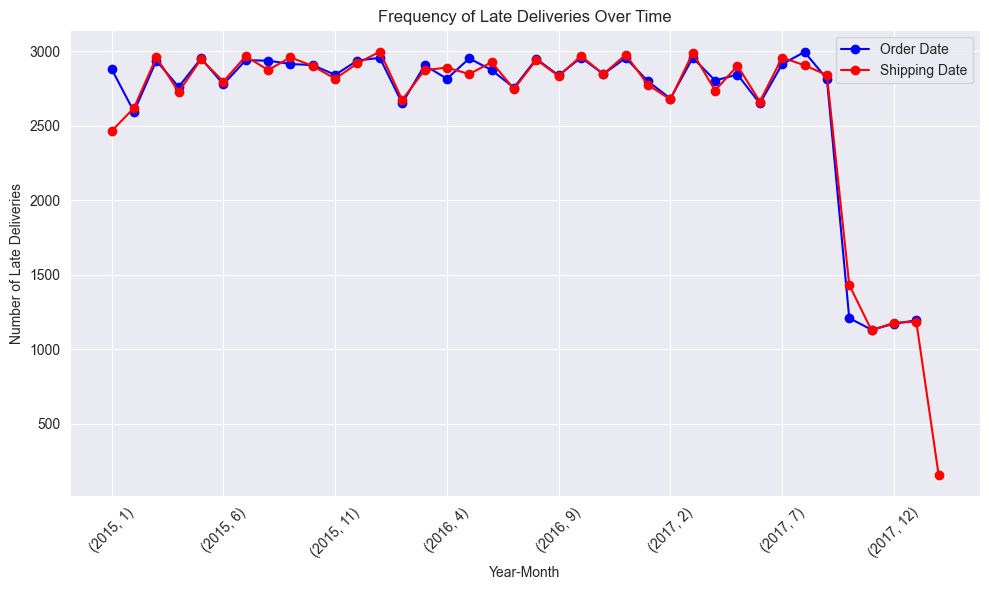

In [6]:
late_deliveries_by_order_date = v_df[v_df['Late_delivery_risk'] == 1].groupby(['order_year', 'order_month']).size()

late_deliveries_by_shipping_date = v_df[v_df['Late_delivery_risk'] == 1].groupby(['shipping_year', 'shipping_month']).size()

plt.figure(figsize=(10, 6))

late_deliveries_by_order_date.plot(kind='line', marker='o', color='b', label='Order Date')

late_deliveries_by_shipping_date.plot(kind='line', marker='o', color='r', label='Shipping Date')

plt.title('Frequency of Late Deliveries Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Late Deliveries')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
print("Late Deliveries by Order Date:")
print(late_deliveries_by_order_date)

print("\nLate Deliveries by Shipping Date:")
print(late_deliveries_by_shipping_date)

Late Deliveries by Order Date:
order_year  order_month
2015        1              2880
            2              2594
            3              2936
            4              2760
            5              2951
            6              2778
            7              2939
            8              2936
            9              2914
            10             2906
            11             2841
            12             2937
2016        1              2955
            2              2650
            3              2905
            4              2815
            5              2951
            6              2873
            7              2755
            8              2948
            9              2837
            10             2957
            11             2846
            12             2954
2017        1              2797
            2              2682
            3              2955
            4              2803
            5              2843
            6    

### Insights:
Some months show higher late delivery counts compared to others within the same year.\
Late deliveries are slightly higher when considering ORDER DATE compared to SHIPPING DATE.\
Late deliveries decrease notably in last quarter of 2017 compared to previous years

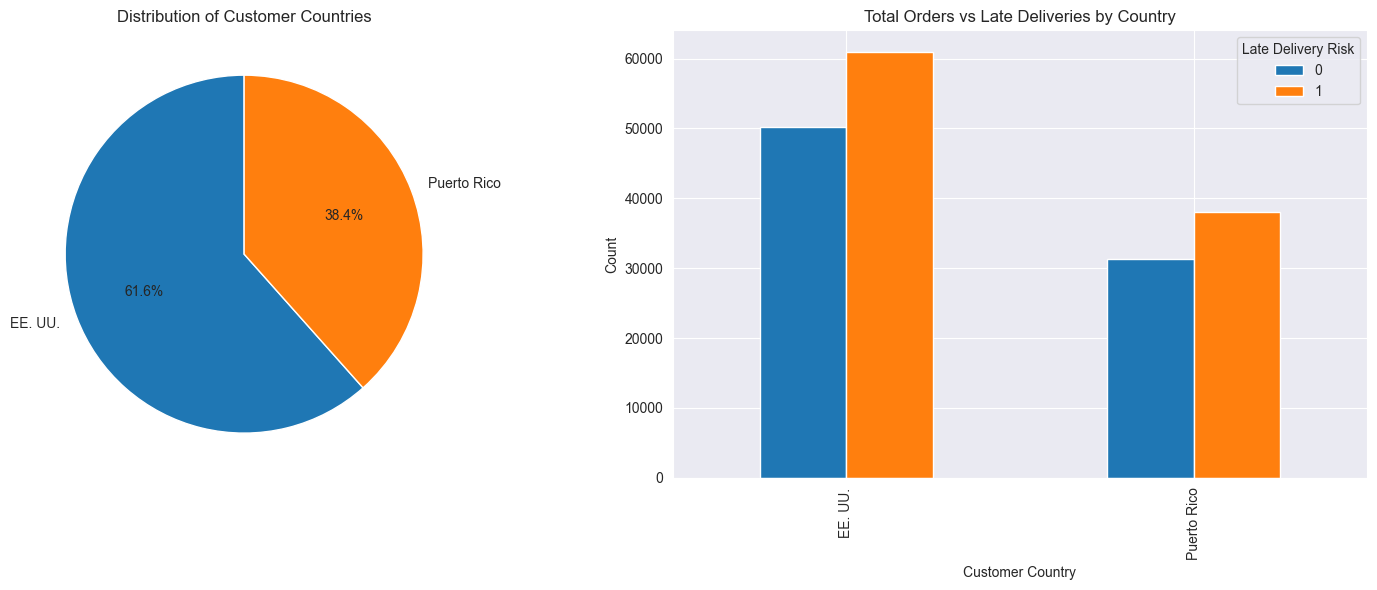

In [8]:
country_counts = v_df['Customer Country'].value_counts()

country_late_delivery_counts = v_df.groupby(['Customer Country', 'Late_delivery_risk']).size().unstack(fill_value=0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution of Customer Countries')

country_late_delivery_counts.plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Orders vs Late Deliveries by Country')
axs[1].set_ylabel('Count')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [9]:
print("Distribution of Customer Countries:")
print(country_counts)

print("\nTotal Orders vs Late Deliveries by Country:")
print(country_late_delivery_counts)

Distribution of Customer Countries:
Customer Country
EE. UU.        111146
Puerto Rico     69373
Name: count, dtype: int64

Total Orders vs Late Deliveries by Country:
Late_delivery_risk      0      1
Customer Country                
EE. UU.             50160  60986
Puerto Rico         31382  37991


### Insights:
The majority of customers are from the United States (EE. UU.), followed by PUERTO RICO.\
PUERTO RICO has a higher proportion of late deliveries compared to the UNITED STATES, despite having a larger customer base.

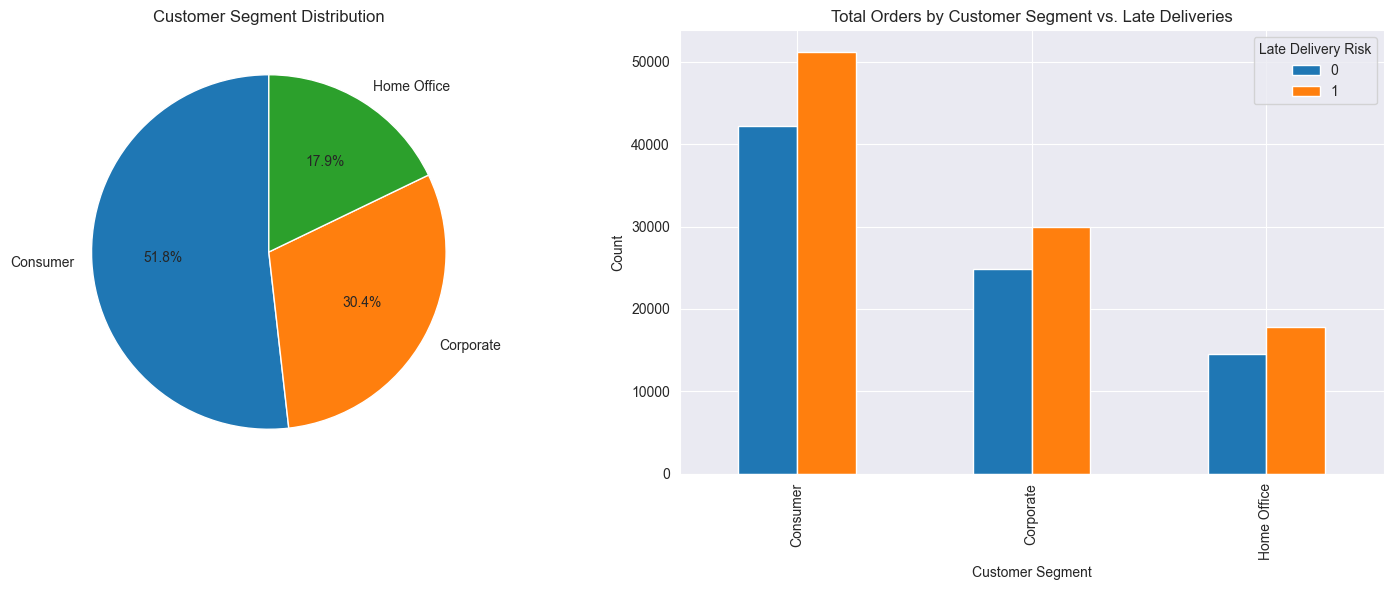

In [10]:
segment_counts = v_df['Customer Segment'].value_counts()

segment_late_delivery_counts = v_df.groupby(['Customer Segment', 'Late_delivery_risk']).size().unstack(fill_value=0)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Customer Segment Distribution')

segment_late_delivery_counts.plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Orders by Customer Segment vs. Late Deliveries')
axs[1].set_ylabel('Count')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [11]:
print("Customer Segment Distribution:")
print(segment_counts)

print("\nTotal Orders by Customer Segment vs. Late Deliveries:")
print(segment_late_delivery_counts)

Customer Segment Distribution:
Customer Segment
Consumer       93504
Corporate      54789
Home Office    32226
Name: count, dtype: int64

Total Orders by Customer Segment vs. Late Deliveries:
Late_delivery_risk      0      1
Customer Segment                
Consumer            42256  51248
Corporate           24807  29982
Home Office         14479  17747


### Insights:
CONSUMERS represent the largest segment, followed by CORPORATE and HOME OFFICE customers.\
Across all segments, there is a notable proportion of late deliveries, with CONSUMERS experiencing the highest count of late deliveries followed by CORPORATE and HOME OFFICE segments.

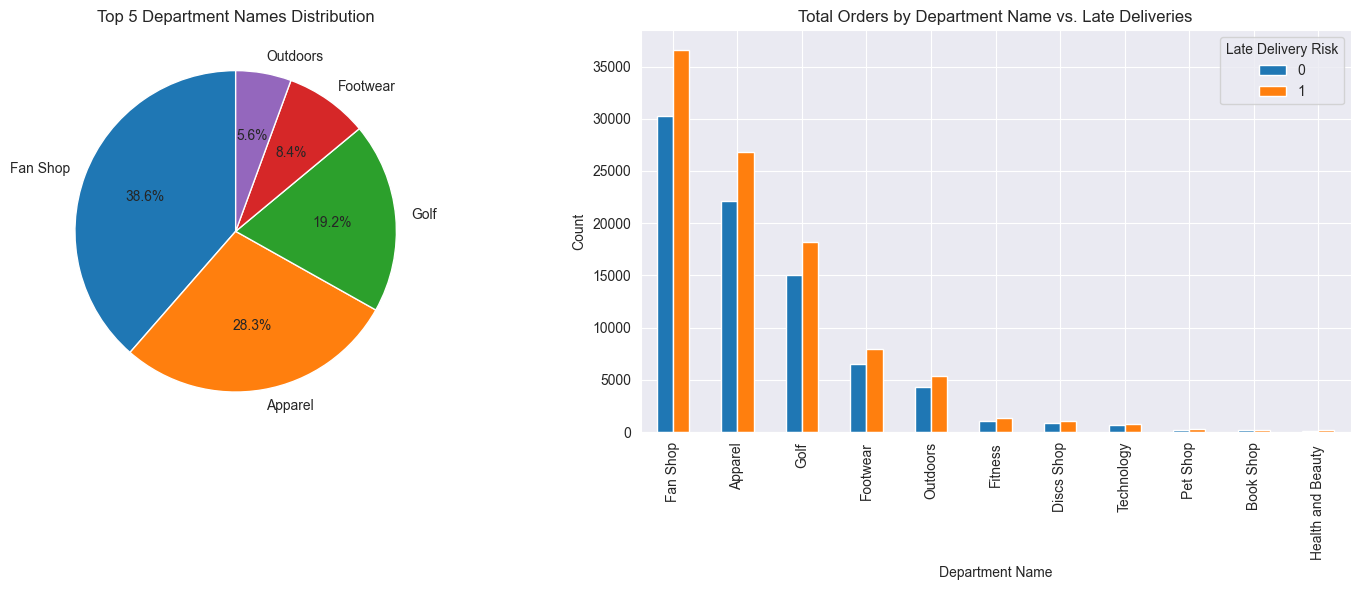

In [12]:
department_counts = v_df['Department Name'].value_counts()

department_counts_sorted = department_counts.sort_values(ascending=False)

top_departments_pie = department_counts_sorted.head(5)

department_late_delivery_counts = v_df.groupby(['Department Name', 'Late_delivery_risk']).size().unstack(fill_value=0)

department_late_delivery_counts_sorted = department_late_delivery_counts.loc[department_counts_sorted.index]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(top_departments_pie, labels=top_departments_pie.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Top 5 Department Names Distribution')

department_late_delivery_counts_sorted.plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Orders by Department Name vs. Late Deliveries')
axs[1].set_ylabel('Count')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [13]:
print("Top 5 Department Names Distribution:")
print(top_departments_pie)

print("\nTotal Orders by Department Name vs. Late Deliveries:")
print(department_late_delivery_counts_sorted)

Top 5 Department Names Distribution:
Department Name
Fan Shop    66861
Apparel     48998
Golf        33220
Footwear    14525
Outdoors     9686
Name: count, dtype: int64

Total Orders by Department Name vs. Late Deliveries:
Late_delivery_risk      0      1
Department Name                 
Fan Shop            30238  36623
Apparel             22173  26825
Golf                15022  18198
Footwear             6576   7949
Outdoors             4311   5375
Fitness              1102   1377
Discs Shop            923   1103
Technology            659    806
Pet Shop              202    290
Book Shop             176    229
Health and Beauty     160    202


### Insights:
FAN SHOP is the most prevalent department, followed by APPAREL, GOLF, FOOTWEAR, and OUTDOORS.\
FAN SHOP has the highest count of late deliveries, followed by APPAREL, GOLF, FOOTWEAR, and OUTDOORS.

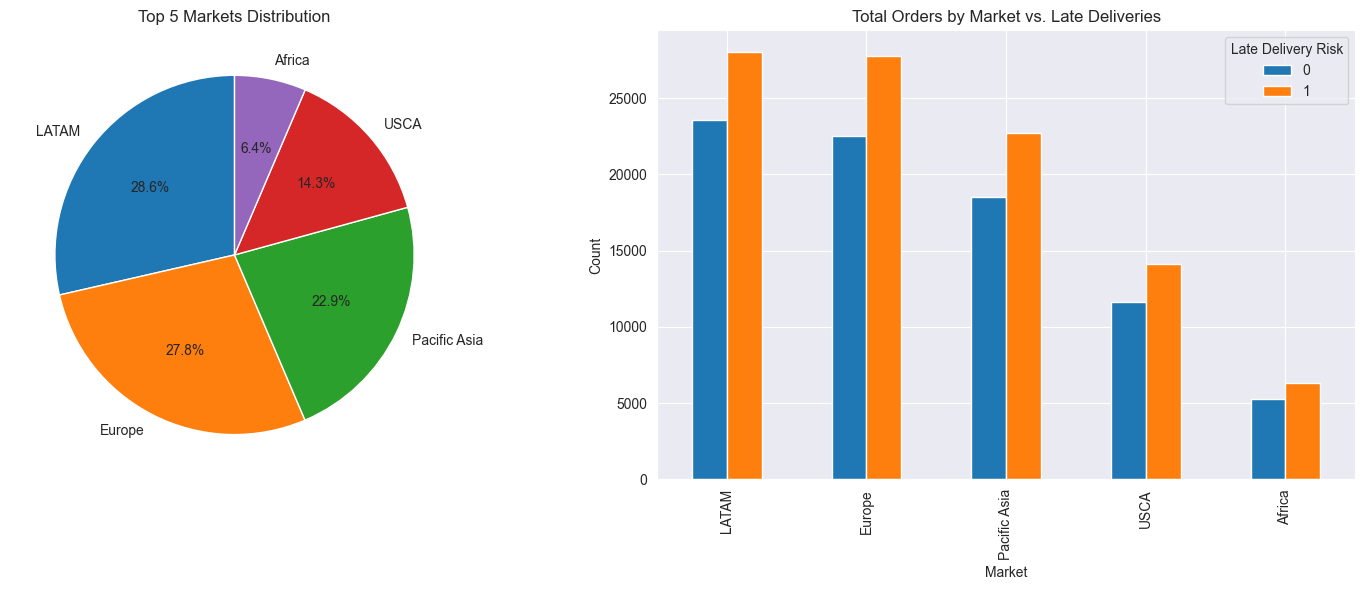

In [14]:
market_counts = v_df['Market'].value_counts()

market_counts_sorted = market_counts.sort_values(ascending=False)

market_late_delivery_counts = v_df.groupby(['Market', 'Late_delivery_risk']).size().unstack(fill_value=0)

market_late_delivery_counts_sorted = market_late_delivery_counts.loc[market_counts_sorted.index]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(market_counts_sorted, labels=market_counts_sorted.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Top 5 Markets Distribution')

market_late_delivery_counts_sorted.plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Orders by Market vs. Late Deliveries')
axs[1].set_ylabel('Count')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [15]:
print("Top 5 Markets Distribution:")
print(market_counts_sorted)

print("\nTotal Orders by Market vs. Late Deliveries:")
print(market_late_delivery_counts_sorted)

Top 5 Markets Distribution:
Market
LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: count, dtype: int64

Total Orders by Market vs. Late Deliveries:
Late_delivery_risk      0      1
Market                          
LATAM               23550  28044
Europe              22509  27743
Pacific Asia        18548  22712
USCA                11661  14138
Africa               5274   6340


### Insights:
LATAM is the largest market, followed by EUROPE, PACIFIC ASIA, USCA, and AFRICA.\
LATAM, EUROPE, and PACIFIC ASIA have the highest counts of late deliveries.

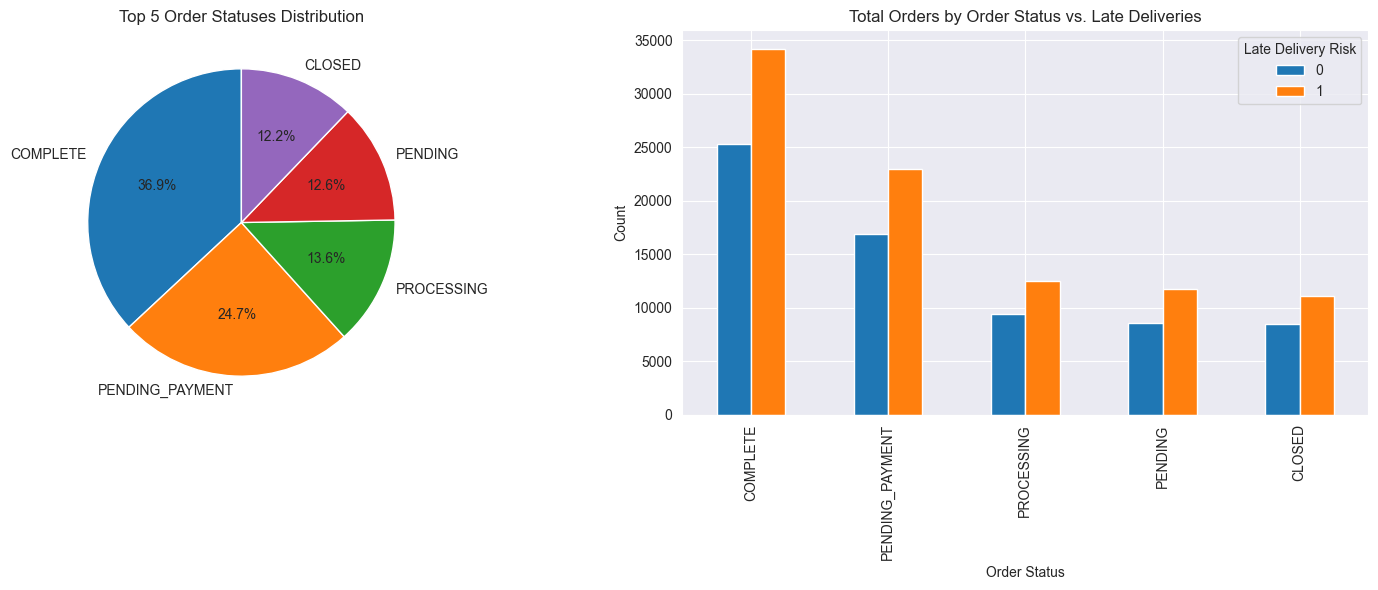

In [16]:
order_status_counts = v_df['Order Status'].value_counts()

order_status_counts_sorted = order_status_counts.sort_values(ascending=False)

top_order_statuses_pie = order_status_counts_sorted.head(5)

order_status_late_delivery_counts = v_df.groupby(['Order Status', 'Late_delivery_risk']).size().unstack(fill_value=0)

order_status_late_delivery_counts_sorted = order_status_late_delivery_counts.loc[top_order_statuses_pie.index]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(top_order_statuses_pie, labels=top_order_statuses_pie.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Top 5 Order Statuses Distribution')

order_status_late_delivery_counts_sorted.plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Orders by Order Status vs. Late Deliveries')
axs[1].set_ylabel('Count')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [17]:
print("Top 5 Order Statuses Distribution:")
print(top_order_statuses_pie)

print("\nTotal Orders by Order Status vs. Late Deliveries:")
print(order_status_late_delivery_counts_sorted)

Top 5 Order Statuses Distribution:
Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
Name: count, dtype: int64

Total Orders by Order Status vs. Late Deliveries:
Late_delivery_risk      0      1
Order Status                    
COMPLETE            25292  34199
PENDING_PAYMENT     16910  22922
PROCESSING           9399  12503
PENDING              8515  11712
CLOSED               8507  11109


### Insights:
The most common order status is COMPLETE, followed by PENDING_PAYMENT, PROCESSING, PENDING, and CLOSED.\
Orders with COMPLETE status have the highest count of late deliveries, followed by those in PENDING_PAYMENT status.

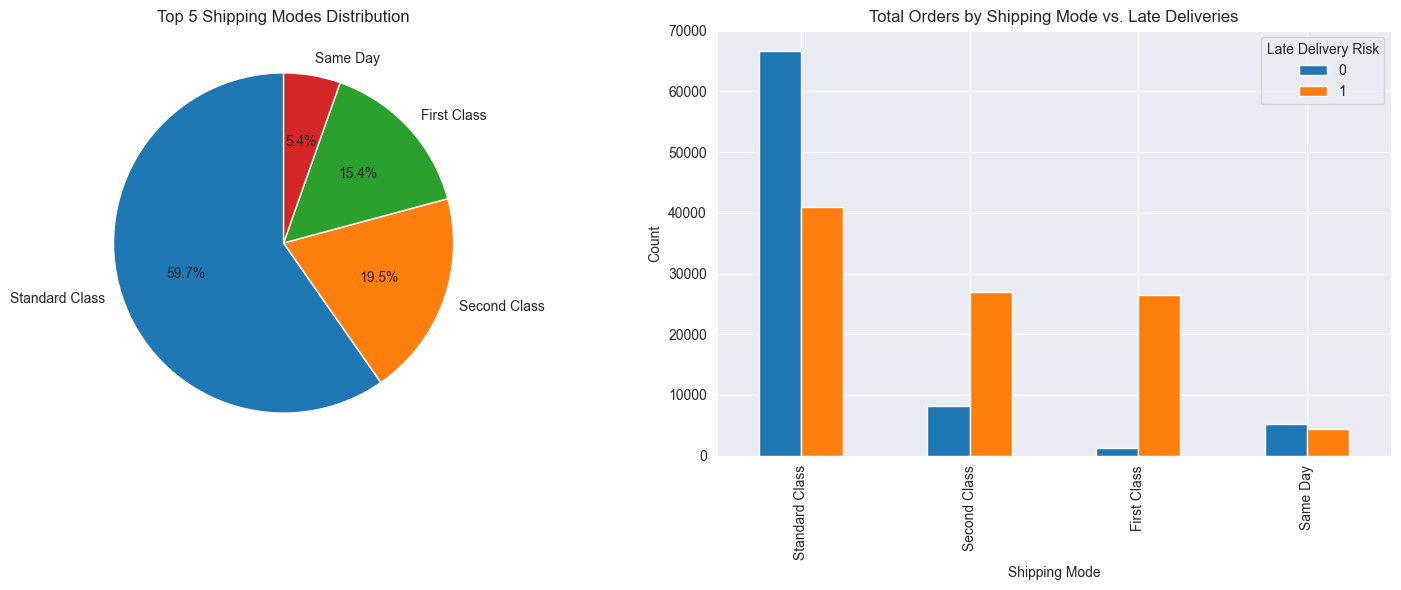

In [18]:
shipping_mode_counts = v_df['Shipping Mode'].value_counts()

shipping_mode_counts_sorted = shipping_mode_counts.sort_values(ascending=False)

top_shipping_modes_pie = shipping_mode_counts_sorted.head(5)

shipping_mode_late_delivery_counts = v_df.groupby(['Shipping Mode', 'Late_delivery_risk']).size().unstack(fill_value=0)

shipping_mode_late_delivery_counts_sorted = shipping_mode_late_delivery_counts.loc[top_shipping_modes_pie.index]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].pie(top_shipping_modes_pie, labels=top_shipping_modes_pie.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Top 5 Shipping Modes Distribution')

shipping_mode_late_delivery_counts_sorted.plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Orders by Shipping Mode vs. Late Deliveries')
axs[1].set_ylabel('Count')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [19]:
print("Top 5 Shipping Modes Distribution:")
print(top_shipping_modes_pie)

print("\nTotal Orders by Shipping Mode vs. Late Deliveries:")
print(shipping_mode_late_delivery_counts_sorted)

Top 5 Shipping Modes Distribution:
Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

Total Orders by Shipping Mode vs. Late Deliveries:
Late_delivery_risk      0      1
Shipping Mode                   
Standard Class      66729  41023
Second Class         8229  26987
First Class          1301  26513
Same Day             5283   4454


### Insights:
STANDARD CLASS is the most commonly chosen shipping mode, followed by SECOND CLASS, FIRST CLASS, and SAME DAY.
Despite its popularity, STANDARD CLASS experiences a significant number of late deliveries.

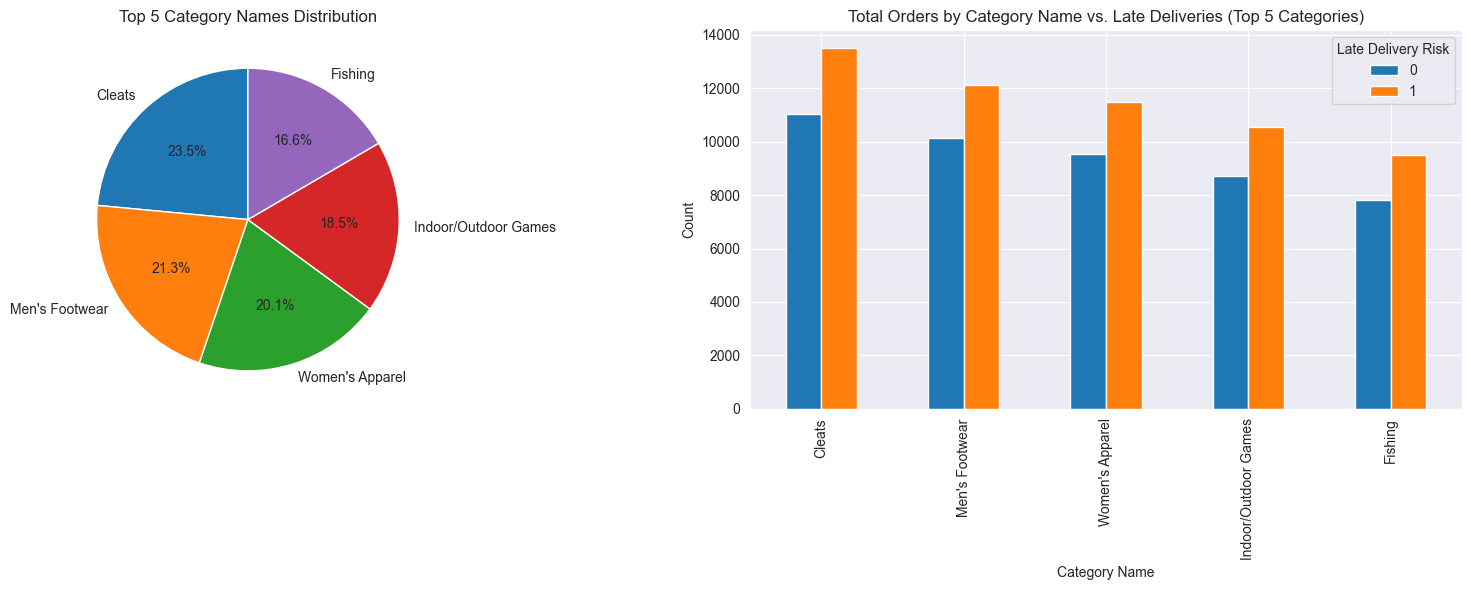

In [20]:
category_counts = v_df['Category Name'].value_counts()

category_counts_sorted = category_counts.sort_values(ascending=False)

top_categories_pie = category_counts_sorted.head(5)

category_late_delivery_counts = v_df.groupby(['Category Name', 'Late_delivery_risk']).size().unstack(fill_value=0)

category_late_delivery_counts_sorted = category_late_delivery_counts.loc[top_categories_pie.index]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].pie(top_categories_pie, labels=top_categories_pie.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Top 5 Category Names Distribution')

top_categories_bar = category_late_delivery_counts_sorted.head(5)

top_categories_bar.plot(kind='bar', ax=axs[1])
axs[1].set_title('Total Orders by Category Name vs. Late Deliveries (Top 5 Categories)')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Category Name')
axs[1].legend(title='Late Delivery Risk')

plt.tight_layout()
plt.show()

In [21]:
print("Top 5 Category Names Distribution:")
print(top_categories_pie)

print("\nTotal Orders by Category Name vs. Late Deliveries (Top 5 Categories):")
print(top_categories_bar)

Top 5 Category Names Distribution:
Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Name: count, dtype: int64

Total Orders by Category Name vs. Late Deliveries (Top 5 Categories):
Late_delivery_risk        0      1
Category Name                     
Cleats                11055  13496
Men's Footwear        10125  12121
Women's Apparel        9559  11476
Indoor/Outdoor Games   8733  10565
Fishing                7809   9516


### Insights:
CLEATS is the most popular category, followed by MEN'S FOOTWEAR, WOMEN'S APPAREL, INDOOR/OUTDOOR GAMES, and FISHING.\
CLEATS, MEN'S FOOTWEAR, and WOMEN'S APPAREL, despite being popular, experience significant late deliveries.

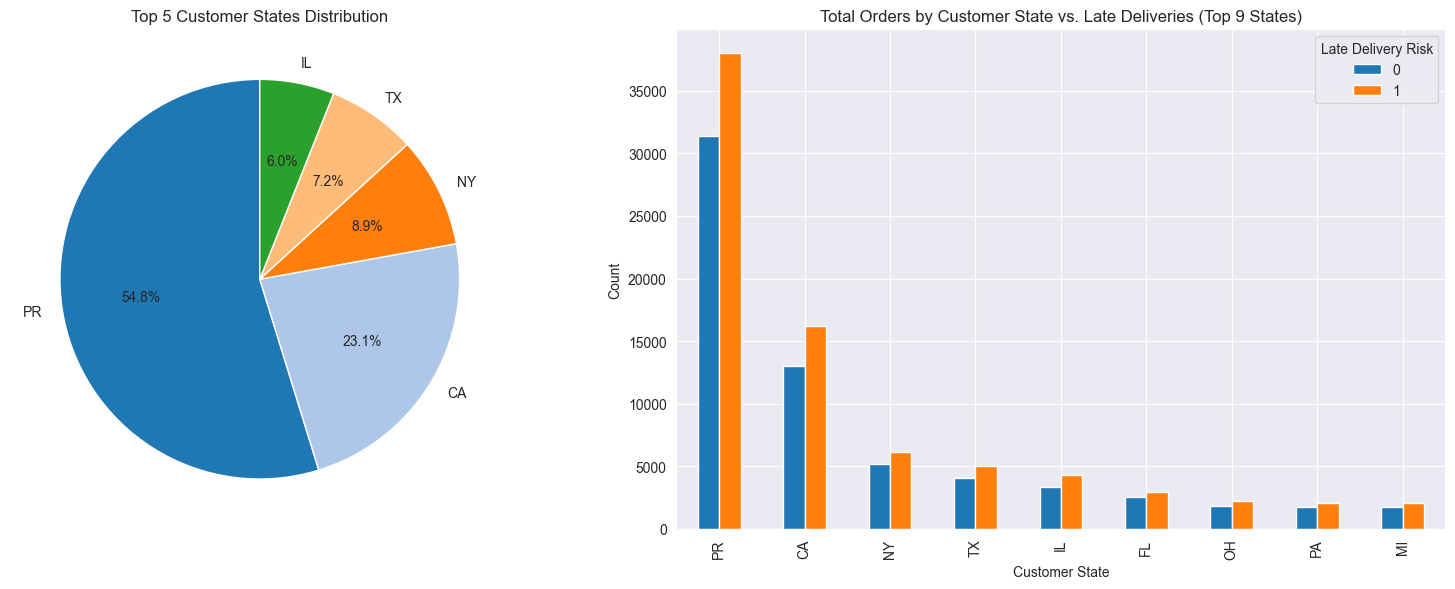

In [22]:
state_counts = v_df['Customer State'].value_counts()

state_counts_sorted = state_counts.sort_values(ascending=False)

top_states_pie = state_counts_sorted.head(5)

state_late_delivery_counts = v_df.groupby(['Customer State', 'Late_delivery_risk']).size().unstack(fill_value=0)

state_late_delivery_counts_sorted = state_late_delivery_counts.loc[state_counts_sorted.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(top_states_pie, labels=top_states_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axes[0].set_title('Top 5 Customer States Distribution')

top_states_bar = state_late_delivery_counts_sorted.head(9)
top_states_bar.plot(kind='bar', ax=axes[1])  
axes[1].set_title('Total Orders by Customer State vs. Late Deliveries (Top 9 States)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Customer State')
axes[1].legend(title='Late Delivery Risk')  

plt.tight_layout()
plt.show()

In [23]:
print("Top 5 Customer States Distribution:")
print(top_states_pie)

print("\nTotal Orders by Customer State vs. Late Deliveries (Top 9 States):")
print(top_states_bar)

Top 5 Customer States Distribution:
Customer State
PR    69373
CA    29223
NY    11327
TX     9103
IL     7631
Name: count, dtype: int64

Total Orders by Customer State vs. Late Deliveries (Top 9 States):
Late_delivery_risk      0      1
Customer State                  
PR                  31382  37991
CA                  13043  16180
NY                   5220   6107
TX                   4075   5028
IL                   3328   4303
FL                   2514   2942
OH                   1833   2262
PA                   1775   2049
MI                   1768   2036


### Insights:
PUERTO RICO and CALIFORNIA have a high volume of orders, they also experience a significant number of late deliveries.

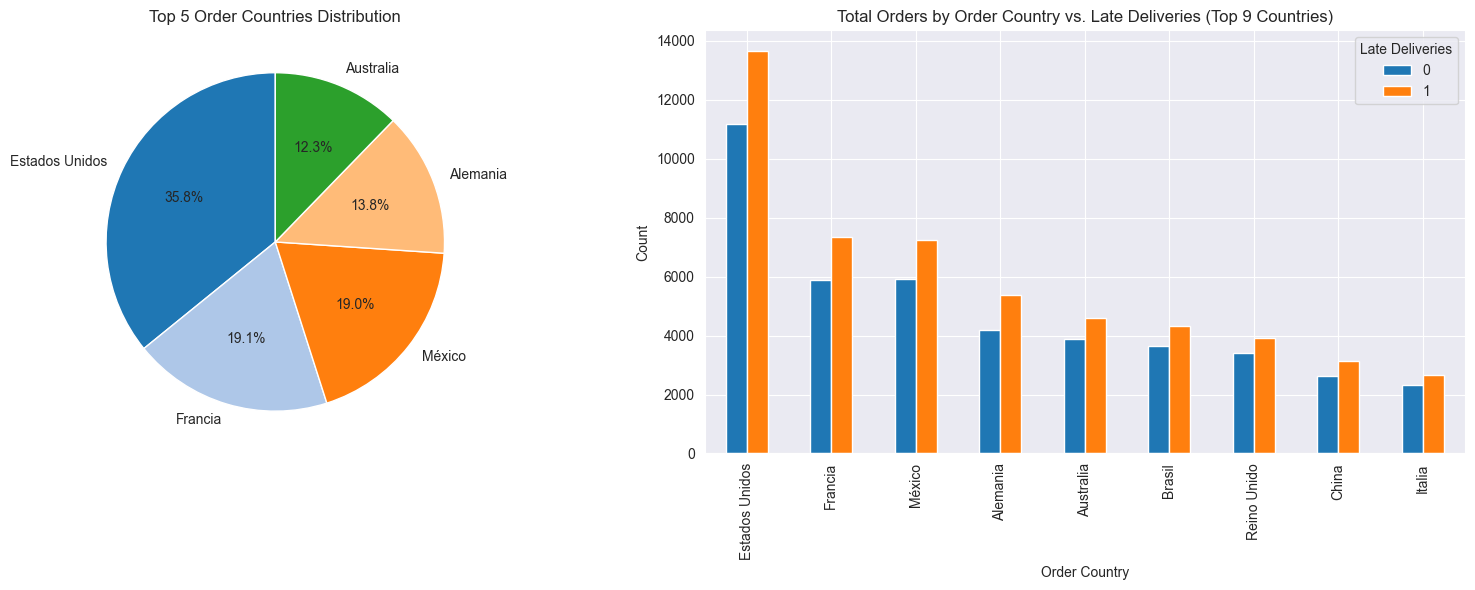

In [24]:
country_counts = v_df['Order Country'].value_counts()

country_counts_sorted = country_counts.sort_values(ascending=False)

top_countries_pie = country_counts_sorted.head(5)

country_late_delivery_counts = v_df.groupby(['Order Country', 'Late_delivery_risk']).size().unstack(fill_value=0)

country_late_delivery_counts_sorted = country_late_delivery_counts.loc[country_counts_sorted.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(top_countries_pie, labels=top_countries_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axes[0].set_title('Top 5 Order Countries Distribution')

top_countries_bar = country_late_delivery_counts_sorted.head(9)
top_countries_bar.plot(kind='bar', ax=axes[1])  
axes[1].set_title('Total Orders by Order Country vs. Late Deliveries (Top 9 Countries)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order Country')
axes[1].legend(title='Late Deliveries')

plt.tight_layout()
plt.show()

In [25]:
print("Top 5 Order Countries Distribution:")
print(top_countries_pie)

print("\nTotal Orders by Order Country vs. Late Deliveries (Top 9 Countries):")
print(country_late_delivery_counts_sorted.head(9))

Top 5 Order Countries Distribution:
Order Country
Estados Unidos    24840
Francia           13222
México            13172
Alemania           9564
Australia          8497
Name: count, dtype: int64

Total Orders by Order Country vs. Late Deliveries (Top 9 Countries):
Late_delivery_risk      0      1
Order Country                   
Estados Unidos      11170  13670
Francia              5881   7341
México               5926   7246
Alemania             4181   5383
Australia            3884   4613
Brasil               3656   4331
Reino Unido          3399   3903
China                2635   3123
Italia               2317   2672


### Insights:
ESTADOS UNIDOS has the highest number of orders.\
ESTADOS UNIDOS has a considerable number of late deliveries, indicating a potentially higher risk of delays.

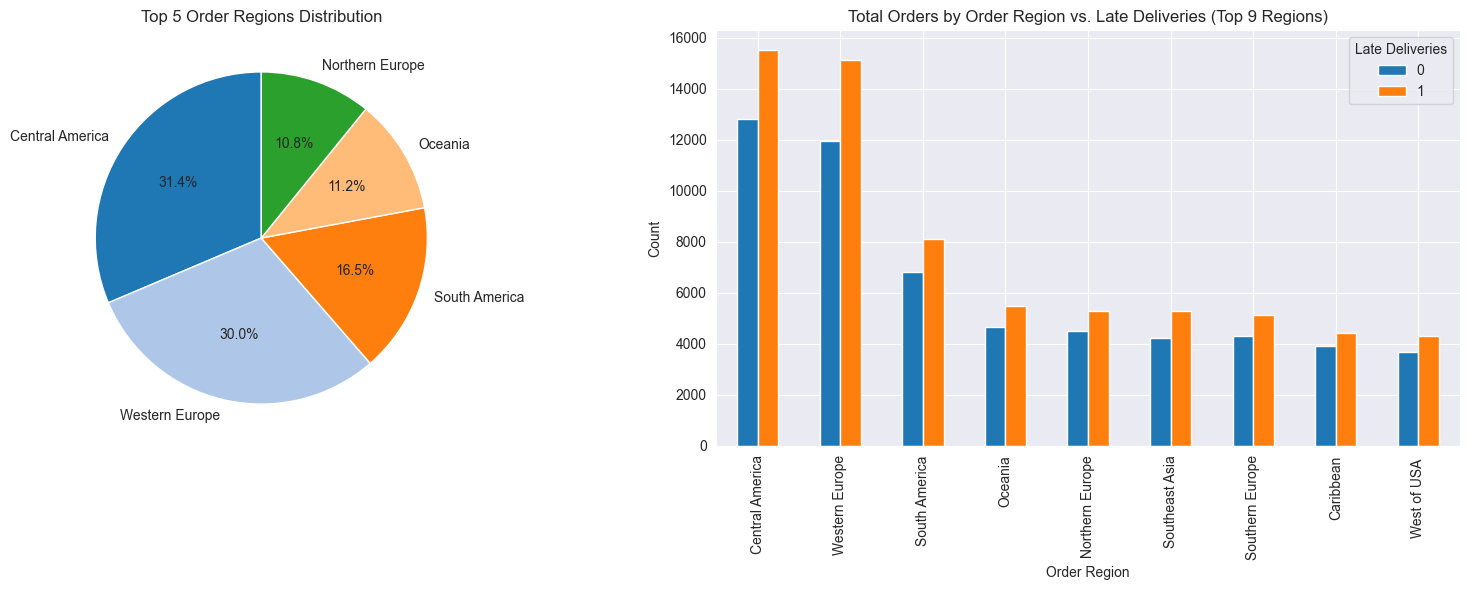

In [26]:
region_counts = v_df['Order Region'].value_counts()

region_counts_sorted = region_counts.sort_values(ascending=False)

top_regions_pie = region_counts_sorted.head(5)

region_late_delivery_counts = v_df.groupby(['Order Region', 'Late_delivery_risk']).size().unstack(fill_value=0)

region_late_delivery_counts_sorted = region_late_delivery_counts.loc[region_counts_sorted.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(top_regions_pie, labels=top_regions_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axes[0].set_title('Top 5 Order Regions Distribution')

top_regions_bar = region_late_delivery_counts_sorted.head(9)
top_regions_bar.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Orders by Order Region vs. Late Deliveries (Top 9 Regions)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order Region')
axes[1].legend(title='Late Deliveries')

plt.tight_layout()
plt.show()

In [27]:
print("Top 5 Order Regions Distribution:")
print(top_regions_pie)

print("\nTotal Orders by Order Region vs. Late Deliveries (Top 9 Regions):")
print(region_late_delivery_counts_sorted.head(9))

Top 5 Order Regions Distribution:
Order Region
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Name: count, dtype: int64

Total Orders by Order Region vs. Late Deliveries (Top 9 Regions):
Late_delivery_risk      0      1
Order Region                    
Central America     12823  15518
Western Europe      11969  15140
South America        6824   8111
Oceania              4666   5482
Northern Europe      4500   5292
Southeast Asia       4242   5297
Southern Europe      4302   5129
Caribbean            3903   4415
West of USA          3680   4313


### Insights:
CENTRAL AMERICA has the highest number of orders and highest counts of late deliveries

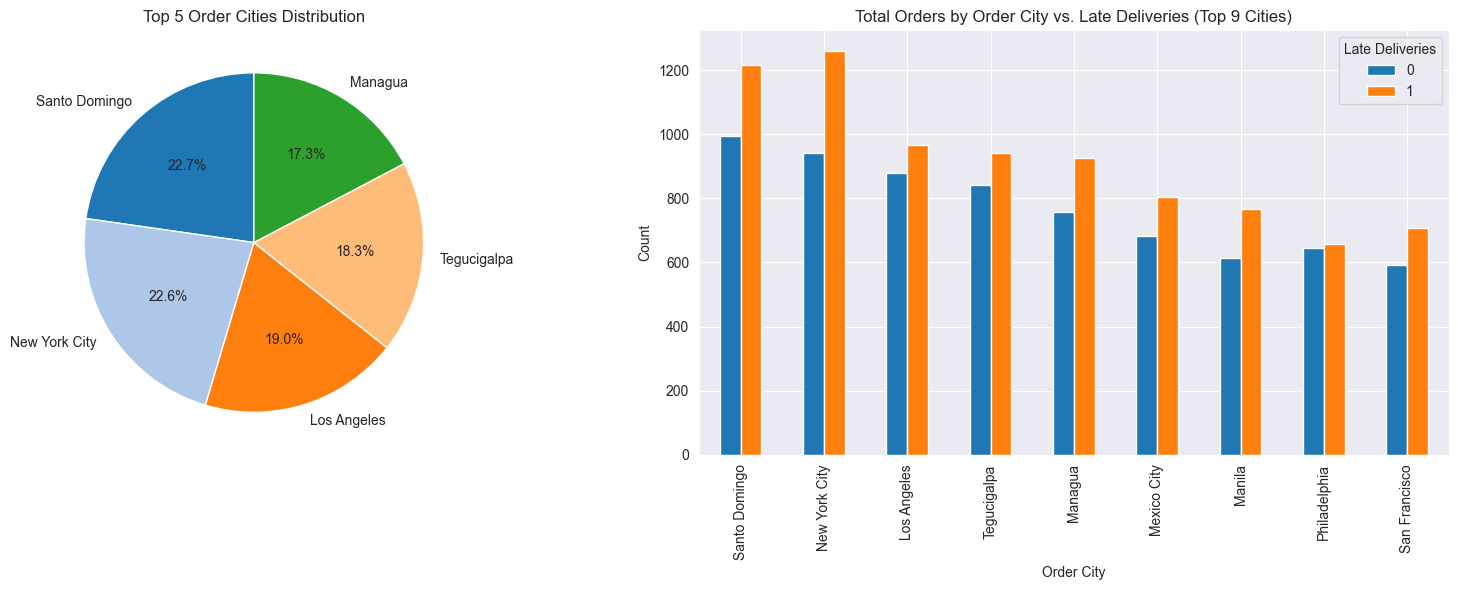

In [28]:
city_counts = v_df['Order City'].value_counts()

city_counts_sorted = city_counts.sort_values(ascending=False)

top_cities_pie = city_counts_sorted.head(5)

city_late_delivery_counts = v_df.groupby(['Order City', 'Late_delivery_risk']).size().unstack(fill_value=0)

city_late_delivery_counts_sorted = city_late_delivery_counts.loc[city_counts_sorted.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(top_cities_pie, labels=top_cities_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axes[0].set_title('Top 5 Order Cities Distribution')

top_cities_bar = city_late_delivery_counts_sorted.head(9)
top_cities_bar.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Orders by Order City vs. Late Deliveries (Top 9 Cities)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order City')
axes[1].legend(title='Late Deliveries')

plt.tight_layout()
plt.show()

In [29]:
print("Top 5 Order Cities Distribution:")
print(top_cities_pie)

print("\nTotal Orders by Order City vs. Late Deliveries (Top 9 Cities):")
print(top_cities_bar)

Top 5 Order Cities Distribution:
Order City
Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
Name: count, dtype: int64

Total Orders by Order City vs. Late Deliveries (Top 9 Cities):
Late_delivery_risk    0     1
Order City                   
Santo Domingo       994  1217
New York City       941  1261
Los Angeles         880   965
Tegucigalpa         841   942
Managua             757   925
Mexico City         681   803
Manila              615   766
Philadelphia        645   657
San Francisco       591   706


### Insights:
SANTO DOMINGO has the highest number of orders, followed by NEW YORK CITY, LOS ANGELES, TEGUCIGALPA, and MANAGUA.\
SANTO DOMINGO also has the highest count of late deliveries among the top order cities, followed by NEW YORK CITY, LOS ANGELES, TEGUCIGALPA, and MANAGUA.

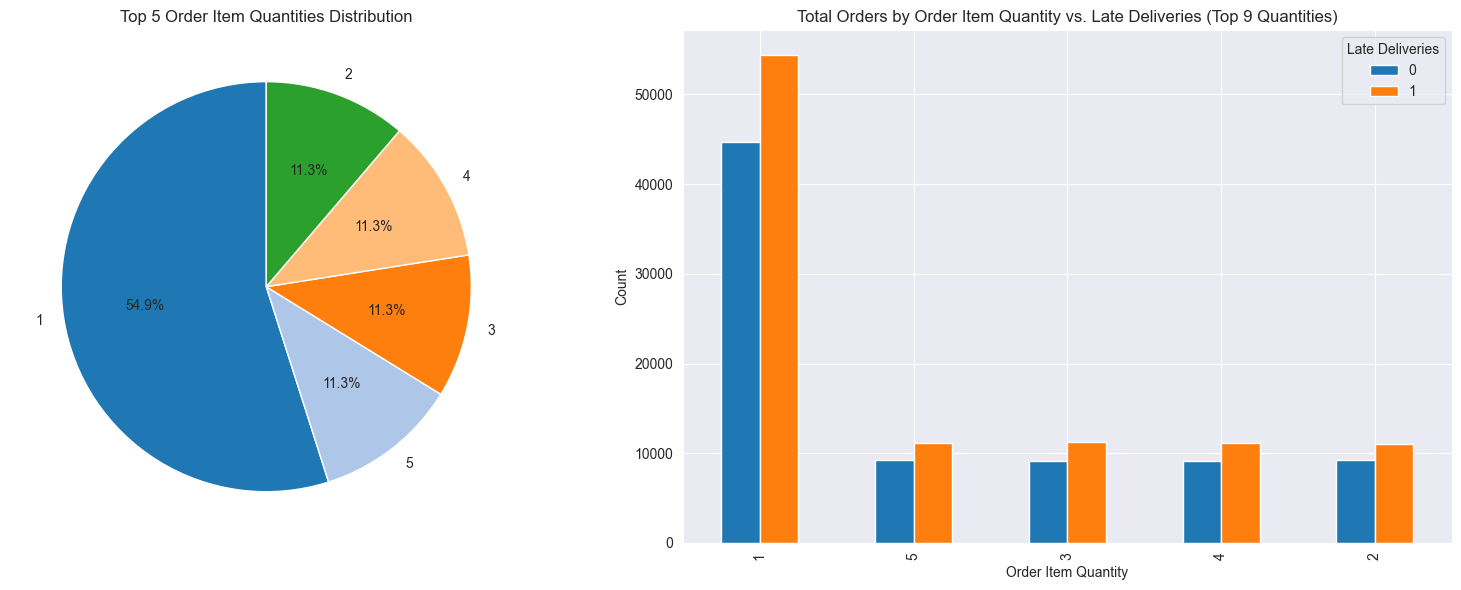

In [30]:
quantity_counts = v_df['Order Item Quantity'].value_counts()

quantity_counts_sorted = quantity_counts.sort_values(ascending=False)

top_quantities_pie = quantity_counts_sorted.head(5)

quantity_late_delivery_counts = v_df.groupby(['Order Item Quantity', 'Late_delivery_risk']).size().unstack(fill_value=0)

quantity_late_delivery_counts_sorted = quantity_late_delivery_counts.loc[quantity_counts_sorted.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(top_quantities_pie, labels=top_quantities_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axes[0].set_title('Top 5 Order Item Quantities Distribution')

top_quantities_bar = quantity_late_delivery_counts_sorted.head(9)
top_quantities_bar.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Orders by Order Item Quantity vs. Late Deliveries (Top 9 Quantities)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order Item Quantity')
axes[1].legend(title='Late Deliveries')

plt.tight_layout()
plt.show()

In [31]:
print("Top 5 Order Item Quantities Distribution:")
print(top_quantities_pie)

print("\nTotal Orders by Order Item Quantity vs. Late Deliveries (Top 9 Quantities):")
print(quantity_late_delivery_counts_sorted.head(9))

Top 5 Order Item Quantities Distribution:
Order Item Quantity
1    99134
5    20385
3    20350
4    20335
2    20315
Name: count, dtype: int64

Total Orders by Order Item Quantity vs. Late Deliveries (Top 9 Quantities):
Late_delivery_risk       0      1
Order Item Quantity              
1                    44729  54405
5                     9215  11170
3                     9134  11216
4                     9188  11147
2                     9276  11039


### Insights:
Orders with a ORDER ITEM QUANTITY 1 has the most common number of total orders, but it also has a significant number of late deliveries.

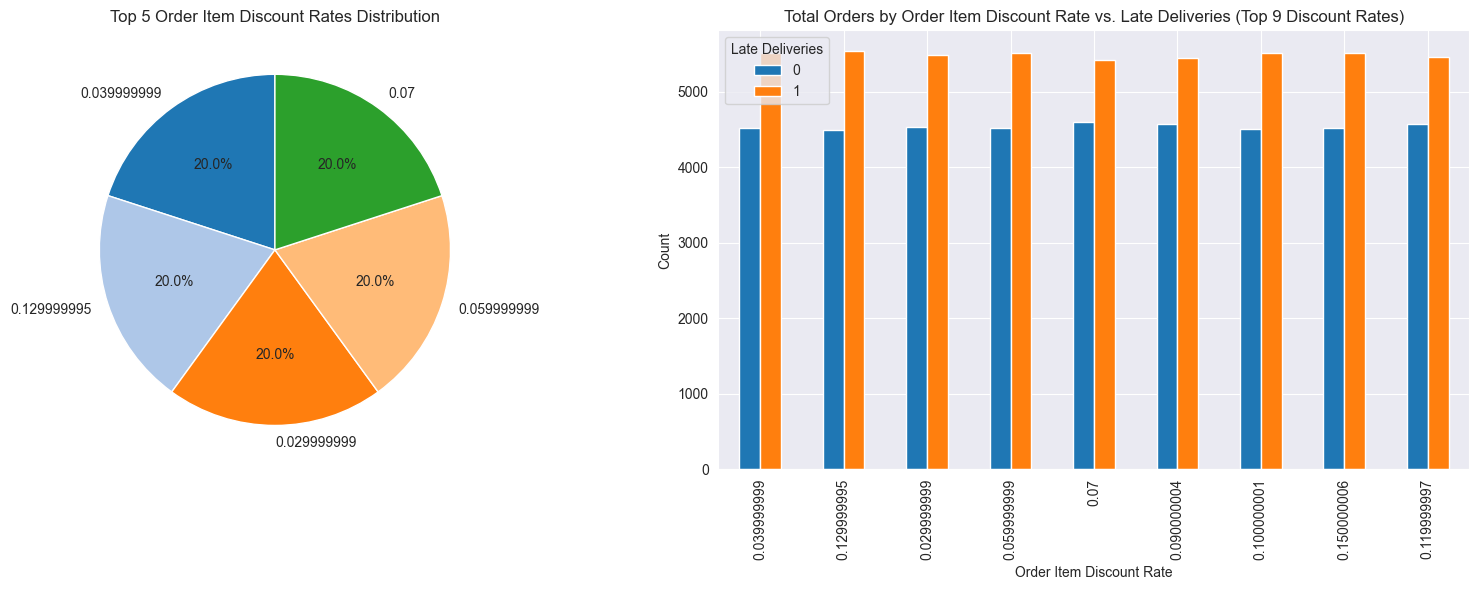

In [32]:
discount_counts = v_df['Order Item Discount Rate'].value_counts()

discount_counts_sorted = discount_counts.sort_values(ascending=False)

top_discounts_pie = discount_counts_sorted.head(5)

discount_late_delivery_counts = v_df.groupby(['Order Item Discount Rate', 'Late_delivery_risk']).size().unstack(fill_value=0)

discount_late_delivery_counts_sorted = discount_late_delivery_counts.loc[discount_counts_sorted.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(top_discounts_pie, labels=top_discounts_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axes[0].set_title('Top 5 Order Item Discount Rates Distribution')

discount_bar = discount_late_delivery_counts_sorted.head(9)
discount_bar.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Orders by Order Item Discount Rate vs. Late Deliveries (Top 9 Discount Rates)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order Item Discount Rate')
axes[1].legend(title='Late Deliveries')

plt.tight_layout()
plt.show()

In [33]:
print("Top 5 Order Item Discount Rates Distribution:")
print(top_discounts_pie)

print("\nTotal Orders by Order Item Discount Rate vs. Late Deliveries (Top 9 Discount Rates):")
print(discount_late_delivery_counts_sorted.head(9))

Top 5 Order Item Discount Rates Distribution:
Order Item Discount Rate
0.04    10029
0.13    10029
0.03    10029
0.06    10029
0.07    10029
Name: count, dtype: int64

Total Orders by Order Item Discount Rate vs. Late Deliveries (Top 9 Discount Rates):
Late_delivery_risk           0     1
Order Item Discount Rate            
0.04                      4517  5512
0.13                      4491  5538
0.03                      4539  5490
0.06                      4517  5512
0.07                      4606  5423
0.09                      4578  5451
0.10                      4514  5515
0.15                      4519  5510
0.12                      4571  5458


### Insights:
ORDER ITEM DISCOUNT RATE are consistent in their occurrence frequency and no potential differences in the impact of DISCOUNTS on delivery performance.

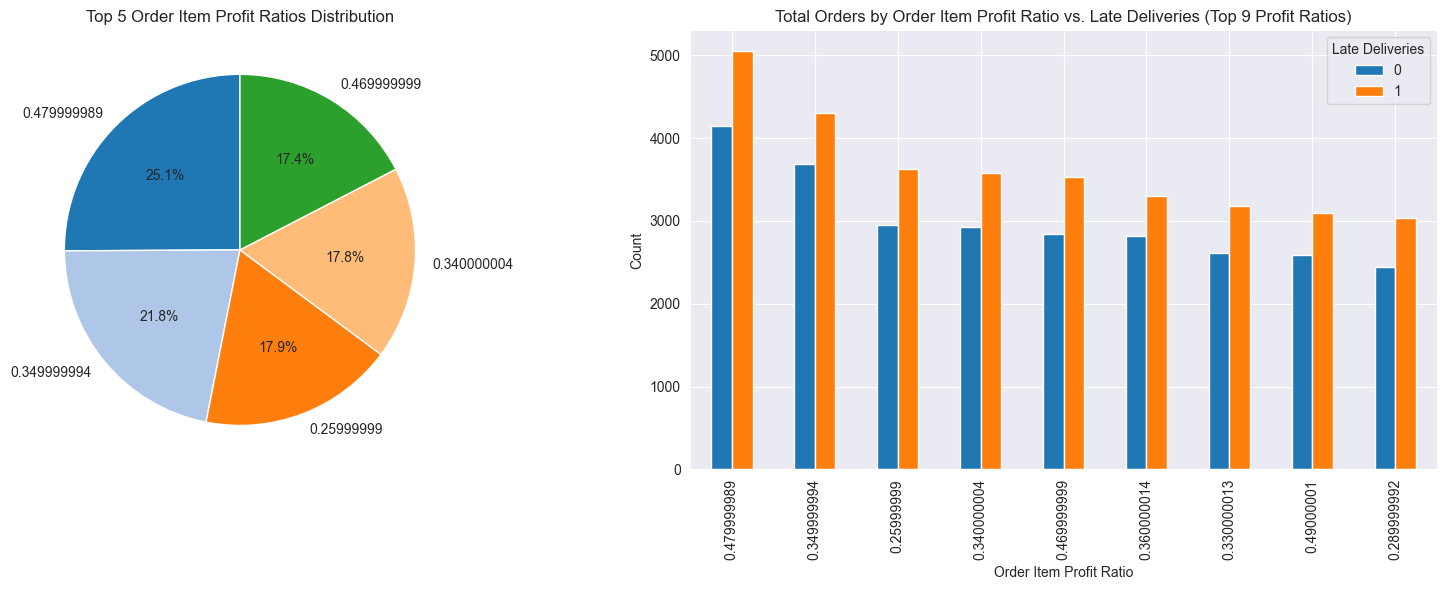

In [34]:
profit_ratio_counts = v_df['Order Item Profit Ratio'].value_counts()

profit_ratio_counts_sorted = profit_ratio_counts.sort_values(ascending=False)

top_profit_ratios_pie = profit_ratio_counts_sorted.head(5)

profit_ratio_late_delivery_counts = v_df.groupby(['Order Item Profit Ratio', 'Late_delivery_risk']).size().unstack(fill_value=0)

profit_ratio_late_delivery_counts_sorted = profit_ratio_late_delivery_counts.loc[profit_ratio_counts_sorted.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(top_profit_ratios_pie, labels=top_profit_ratios_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
axes[0].set_title('Top 5 Order Item Profit Ratios Distribution')

top_profit_ratios_bar = profit_ratio_late_delivery_counts_sorted.head(9)
top_profit_ratios_bar.plot(kind='bar', ax=axes[1])
axes[1].set_title('Total Orders by Order Item Profit Ratio vs. Late Deliveries (Top 9 Profit Ratios)')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Order Item Profit Ratio')
axes[1].legend(title='Late Deliveries')

plt.tight_layout()
plt.show()

In [35]:
print("Top 5 Order Item Profit Ratios Distribution:")
print(top_profit_ratios_pie)

print("\nTotal Orders by Order Item Profit Ratio vs. Late Deliveries (Top 9 Profit Ratios):")
print(profit_ratio_late_delivery_counts_sorted.head(9))

Top 5 Order Item Profit Ratios Distribution:
Order Item Profit Ratio
0.48    9197
0.35    7997
0.26    6577
0.34    6507
0.47    6378
Name: count, dtype: int64

Total Orders by Order Item Profit Ratio vs. Late Deliveries (Top 9 Profit Ratios):
Late_delivery_risk          0     1
Order Item Profit Ratio            
0.48                     4149  5048
0.35                     3692  4305
0.26                     2955  3622
0.34                     2927  3580
0.47                     2844  3534
0.36                     2813  3295
0.33                     2608  3181
0.49                     2589  3099
0.29                     2444  3034


### Insights:
The ORDER ITEM PROFIT RATIO of 0.48 has the highest number of orders and both on-time and late deliveries.\
Despite variations in the counts of on-time and late deliveries across different PROFIT RATIOS, the general trend is that higher PROFIT RATIOS tend to have more orders and deliveries.